# FGMC Fallout Time Series Analysis

We have FGMC Daily Trend data, which has standard pullthrough time series data over one year time frame. Here is couple of things we could do:
* Visualize data, finding trends in the data plot
* Analyzing data, utilizing statistical analysis to forecast based on current data
* Backtesting data, comparing the actual pullthrough rates with those from QRM, and then find the actual performance of our current fallout prediction 

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('pullthrough.csv', index_col='Procdate', parse_dates=True)
df.head()

,FGMC Pullthrough
Procdate,
2014-10-01,83.13
2014-10-02,80.41
2014-10-03,80.38
2014-10-06,80.48
2014-10-07,79.80


In [3]:
df.index

DatetimeIndex(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-06',
               '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-10',
               '2014-10-14', '2014-10-15',
               ...
               '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29',
               '2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-08'],
              dtype='datetime64[ns]', name='Procdate', length=464, freq=None)

In [4]:
ts = df['FGMC Pullthrough'][-10:]
ts

Procdate
2016-07-26    79.67
2016-07-27    80.25
2016-07-28    78.66
2016-07-29    78.60
2016-08-01    77.69
2016-08-02    79.24
2016-08-03    80.24
2016-08-04    79.64
2016-08-05    78.77
2016-08-08    79.91
Name: FGMC Pullthrough, dtype: float64

In [5]:
type(ts)

pandas.core.series.Series

In [6]:
date = ts.index[-1]
date

Timestamp('2016-08-08 00:00:00')

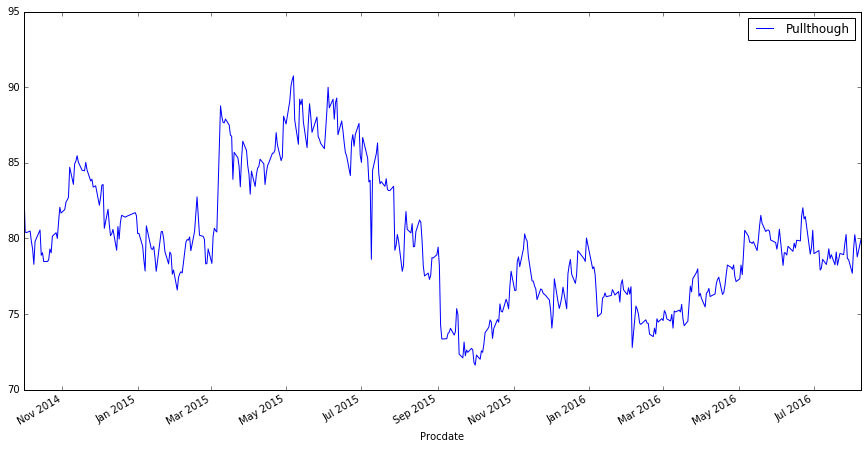

In [7]:
pt = df['FGMC Pullthrough']
plt.figure(figsize=(15,7.5))
pt.plot(label='Pullthough')
plt.legend()

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    plt.figure(figsize=(15,7.5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


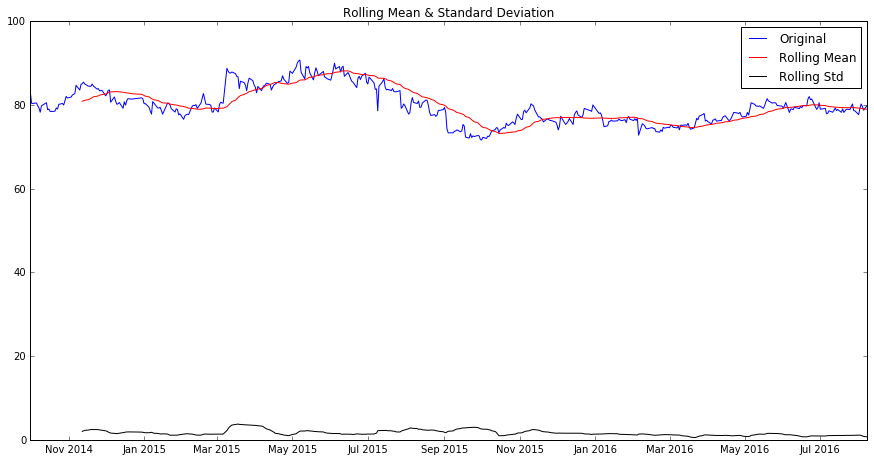

Results of Dickey-Fuller Test:
Test Statistic                  -1.798129
p-value                          0.381391
#Lags Used                       9.000000
Number of Observations Used    454.000000
Critical Value (5%)             -2.867927
Critical Value (10%)            -2.570172
Critical Value (1%)             -3.444836
dtype: float64


In [9]:
test_stationarity(pt)

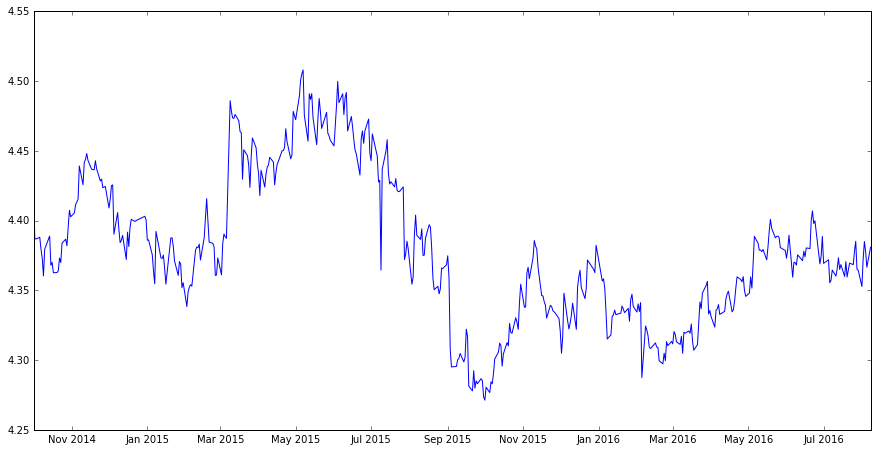

In [10]:
pt_log = np.log(pt)
plt.figure(figsize=(15,7.5))
plt.plot(pt_log)

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':


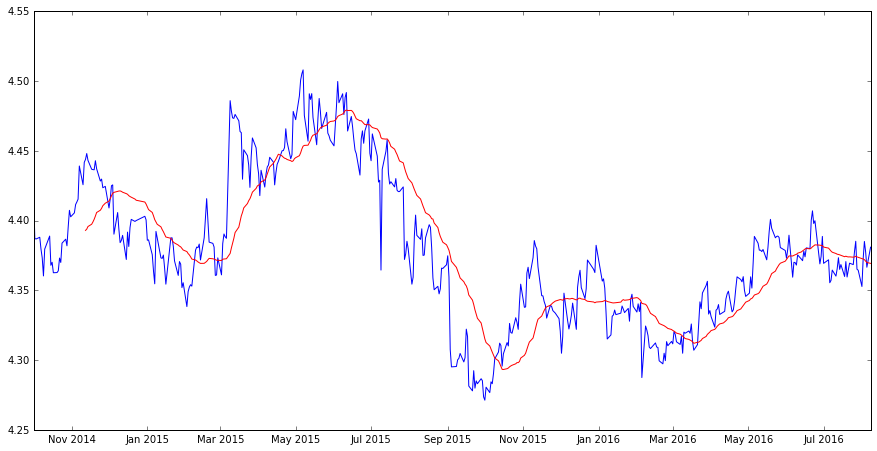

In [11]:
moving_avg = pd.rolling_mean(pt_log,30)
plt.figure(figsize=(15,7.5))
plt.plot(pt_log)
plt.plot(moving_avg, color='red')

In [12]:
pt_log_moving_avg_diff = pt_log - moving_avg
pt_log_moving_avg_diff[-10:]

Procdate
2016-07-26    0.003971
2016-07-27    0.010760
2016-07-28   -0.008823
2016-07-29   -0.009265
2016-08-01   -0.019988
2016-08-02    0.000014
2016-08-03    0.013058
2016-08-04    0.006534
2016-08-05   -0.003404
2016-08-08    0.011597
Name: FGMC Pullthrough, dtype: float64

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


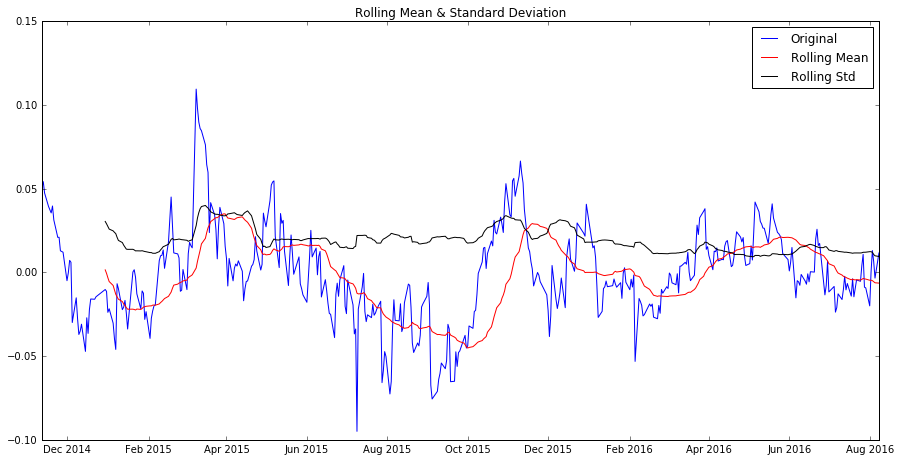

Results of Dickey-Fuller Test:
Test Statistic                  -4.227821
p-value                          0.000591
#Lags Used                       2.000000
Number of Observations Used    432.000000
Critical Value (5%)             -2.868254
Critical Value (10%)            -2.570346
Critical Value (1%)             -3.445578
dtype: float64


In [13]:
pt_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(pt_log_moving_avg_diff)

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=30,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


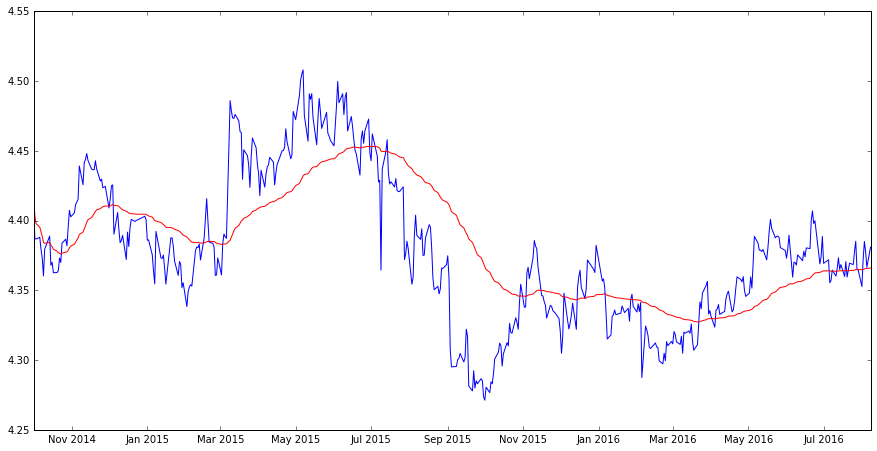

In [14]:
expwighted_avg = pd.ewma(pt_log, halflife=30)
plt.figure(figsize=(15,7.5))
plt.plot(pt_log)
plt.plot(expwighted_avg, color='red')

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


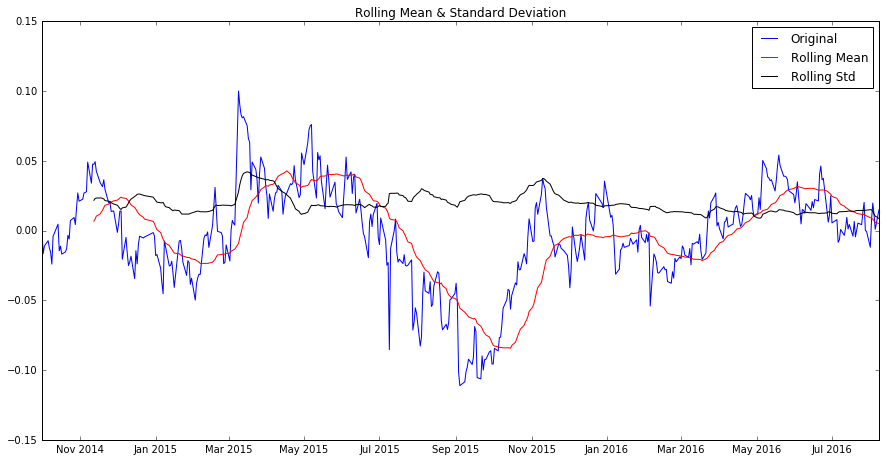

Results of Dickey-Fuller Test:
Test Statistic                  -2.996638
p-value                          0.035210
#Lags Used                       2.000000
Number of Observations Used    461.000000
Critical Value (5%)             -2.867830
Critical Value (10%)            -2.570120
Critical Value (1%)             -3.444615
dtype: float64


In [15]:
pt_log_ewma_diff = pt_log - expwighted_avg
test_stationarity(pt_log_ewma_diff)

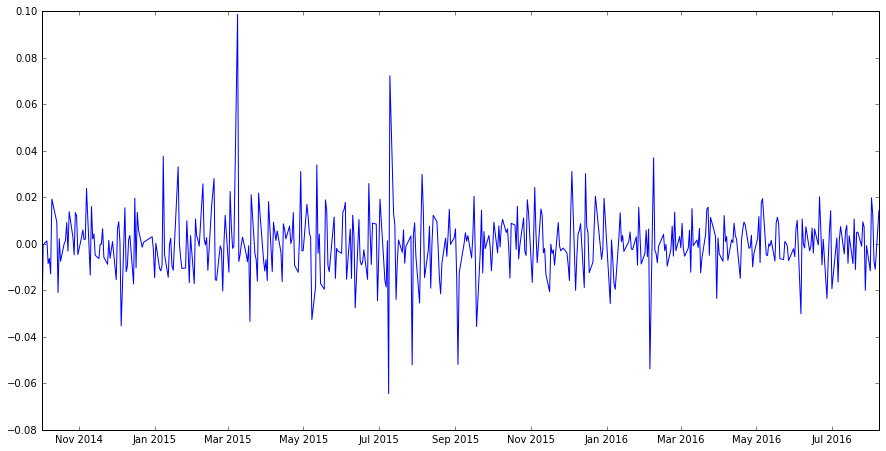

In [16]:
pt_log_diff = pt_log - pt_log.shift()
plt.figure(figsize=(15,7.5))
plt.plot(pt_log_diff)

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


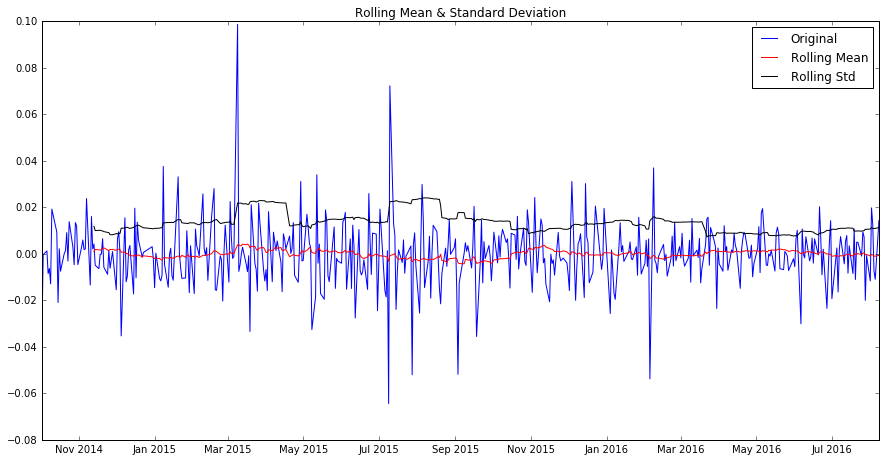

Results of Dickey-Fuller Test:
Test Statistic                -7.929917e+00
p-value                        3.535713e-12
#Lags Used                     8.000000e+00
Number of Observations Used    4.540000e+02
Critical Value (5%)           -2.867927e+00
Critical Value (10%)          -2.570172e+00
Critical Value (1%)           -3.444836e+00
dtype: float64


In [17]:
pt_log_diff.dropna(inplace=True)
test_stationarity(pt_log_diff)

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


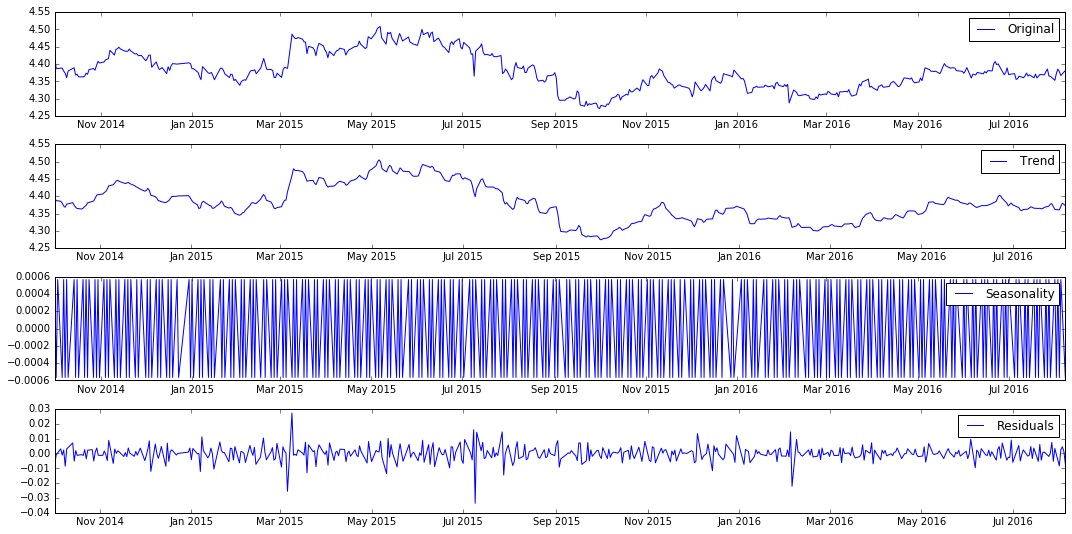

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pt_log,freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,7.5))
plt.subplot(411)
plt.plot(pt_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


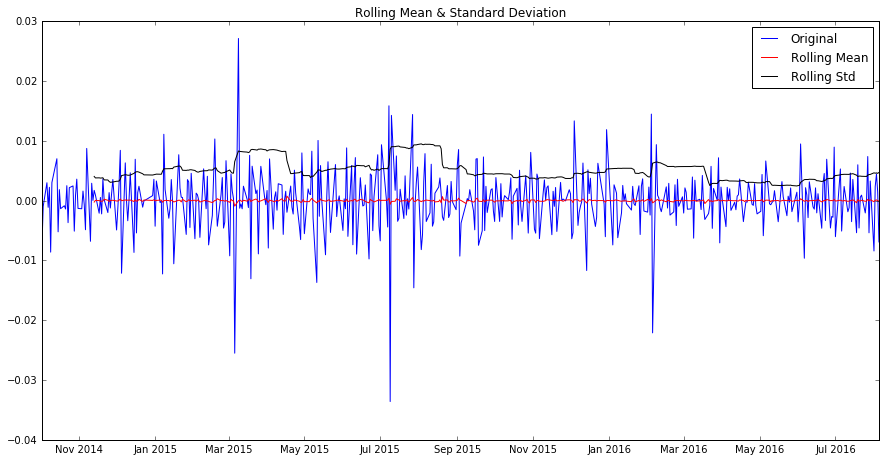

Results of Dickey-Fuller Test:
Test Statistic                -1.014195e+01
p-value                        8.375376e-18
#Lags Used                     1.700000e+01
Number of Observations Used    4.440000e+02
Critical Value (5%)           -2.868072e+00
Critical Value (10%)          -2.570249e+00
Critical Value (1%)           -3.445164e+00
dtype: float64


In [19]:
pt_log_decompose = residual
pt_log_decompose.dropna(inplace=True)
test_stationarity(pt_log_decompose)

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [21]:
lag_acf = acf(pt_log_diff, nlags=20)
lag_pacf = pacf(pt_log_diff, nlags=20, method='ols')

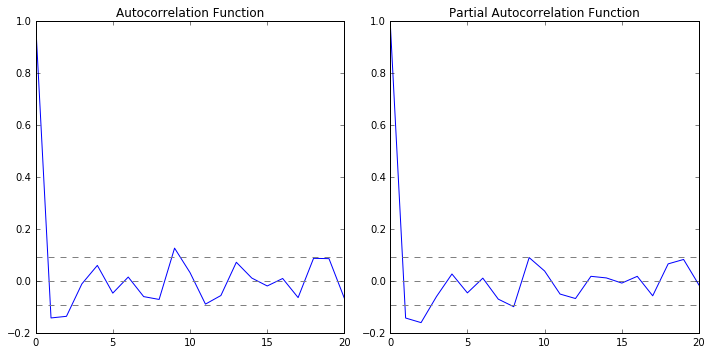

In [22]:
#Plot ACF: 
plt.figure(figsize=(10,5))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(pt_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(pt_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(pt_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(pt_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\carl.qin\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


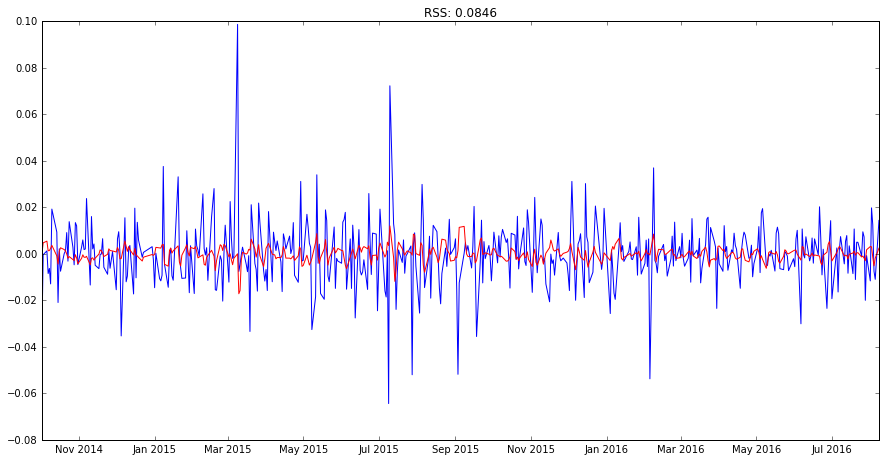

In [24]:
model = ARIMA(pt_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,7.5))
plt.plot(pt_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-pt_log_diff)**2))

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Procdate
2014-10-02   -0.000069
2014-10-03    0.004716
2014-10-06    0.005445
2014-10-07    0.001329
2014-10-08    0.001379
dtype: float64


In [26]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Procdate
2014-10-02   -0.000069
2014-10-03    0.004647
2014-10-06    0.010092
2014-10-07    0.011421
2014-10-08    0.012800
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(pt_log.ix[0], index=pt_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Procdate
2014-10-01    4.420406
2014-10-02    4.420336
2014-10-03    4.425052
2014-10-06    4.430498
2014-10-07    4.431826
dtype: float64

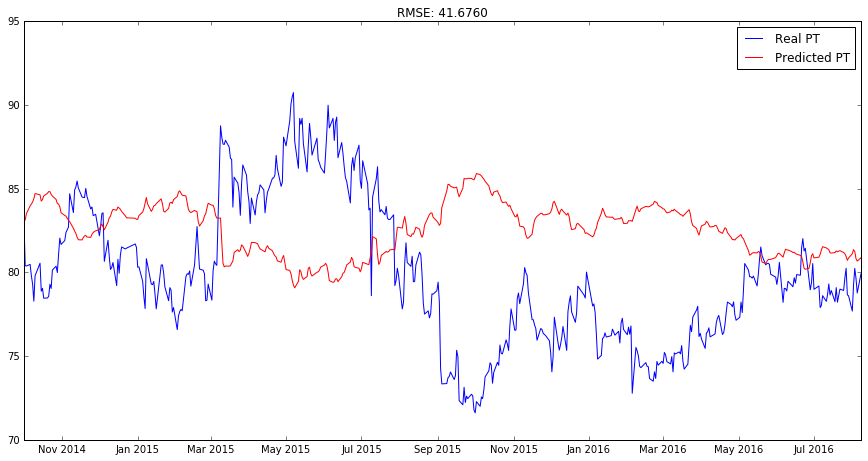

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15,7.5))
plt.plot(pt,color='blue',label='Real PT')
plt.plot(predictions_ARIMA,color='Red',label='Predicted PT')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-pt)**2)/len(ts)))
plt.legend(loc='best')
plt.show()